


## Деревья решений для задач классификации
### Для датасета "winequality-white.csv"
Выполнили:
    Лавриченко О.
    Дунаева О.
    Пластинин В.

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import collections

In [20]:
import os

In [21]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [24]:
df.shape

(4898, 12)

In [25]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 11].values  

In [26]:
#Объеденим 3,4,9 в один класс 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  

y_train[y_train == 9] = 4
y_train[y_train == 3] = 4


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=10,
                            
                               min_samples_split=5,
                            
                               min_samples_leaf=5,
                              
                               class_weight=None,
                              
                               presort=False
                              )

# Обучаем модель
model.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [28]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)


,feature,importance
10,alcohol,0.222110
1,volatile acidity,0.119408
7,density,0.092652
0,fixed acidity,0.084539
8,pH,0.083469
6,total sulfur dioxide,0.076056
5,free sulfur dioxide,0.075046
9,sulphates,0.066998
3,residual sugar,0.065720
4,chlorides,0.059469


In [29]:
# Строим предсказание модели

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix  

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

           4       0.67      0.38      0.48       128
           5       0.75      0.79      0.77      1005
           6       0.72      0.79      0.75      1429
           7       0.70      0.62      0.66       591
           8       0.59      0.30      0.40       128

   micro avg       0.72      0.72      0.72      3281
   macro avg       0.69      0.58      0.61      3281
weighted avg       0.72      0.72      0.72      3281

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.15      0.20        53
           5       0.53      0.60      0.56       452
           6       0.59      0.62      0.61       769
           7       0.47      0.40      0.43       289
           8       0.10      0.06      0.08        47
           9       0.00      0.00      0.00         1

   micro avg       0.54      0.54      0.54      1617
   macro avg       0.29

/Users/olgalavricenko/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


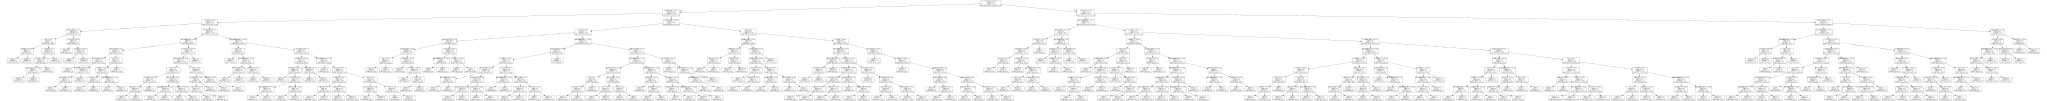

In [31]:
import graphviz 
from sklearn import tree
graphviz.Source( tree.export_graphviz(model, out_file=None, feature_names=df.iloc[:, :-1].columns))

In [32]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test)) 

[[  48   33   39    8    0]
 [  15  795  161   30    4]
 [   6  200 1122   88   13]
 [   3   21  188  369   10]
 [   0   16   43   30   39]]
              precision    recall  f1-score   support

           4       0.67      0.38      0.48       128
           5       0.75      0.79      0.77      1005
           6       0.72      0.79      0.75      1429
           7       0.70      0.62      0.66       591
           8       0.59      0.30      0.40       128

   micro avg       0.72      0.72      0.72      3281
   macro avg       0.69      0.58      0.61      3281
weighted avg       0.72      0.72      0.72      3281

[[  0   0   4   2   0   0   0]
 [  0   8  28  13   4   0   0]
 [  0  10 272 149  20   1   0]
 [  0   8 180 478  89  14   0]
 [  0   1  22 139 116  11   0]
 [  0   0   5  22  17   3   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.15      0.20

/Users/olgalavricenko/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
accuracy = 1 - np.mean(y_pred_test != y_test)
print(accuracy)

0.5423623995052567
